# Visulaizations and Plots in Time Series Analysis

In [1]:
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Dataset


In [2]:
# importing from kaggle
df = pd.read_csv('data/2/monthly-beer-production-in-austr.csv')

In [3]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df['Year'] = df['Month'].apply(lambda x: x[:4])
df[['Month', 'Year']]

,Month,Year
0,1956-01,1956
1,1956-02,1956
2,1956-03,1956
3,1956-04,1956
4,1956-05,1956
...,...,...
471,1995-04,1995
472,1995-05,1995
473,1995-06,1995
474,1995-07,1995


## Waterfall Plot

In [6]:
df1 = pd.DataFrame(df[df['Year'] == '1965'])
df1


,Month,Monthly beer production,Year
108,1965-01,106.9,1965
109,1965-02,96.6,1965
110,1965-03,127.3,1965
111,1965-04,98.2,1965
112,1965-05,100.2,1965
113,1965-06,89.4,1965
114,1965-07,95.3,1965
115,1965-08,104.2,1965
116,1965-09,106.4,1965
117,1965-10,116.2,1965


In [7]:
class WaterfallChart:
    def __init__(self, df: pd.DataFrame, x: str, y: str, text = None):
        self.df = df
        self.x = x
        self.y = y
        self.text = text
    
    def _delta(self):
        vals = self.df[self.y].to_list()
        new = [vals[0]]
        for i in range(1, len(vals)):
            new.append(vals[i] - vals[i-1])
        return new
    
    def saveplot(self, title, filename, delta = False):
        x = self.df[self.x]
        if delta:
            y = self._delta()
        else:
            y = self.df[self.y]
        measure = ["absolute"] + ["relative"] * (len(self.df)-2)+["total"]
        if self.text is None:
            fig = go.Figure(go.Waterfall(x = x, measure = measure, y = y))
        else:
            measure = ["absolute"] + ["relative"] * (len(self.df)-2)+["total"]
            fig = go.Figure(go.Waterfall(x = x, measure = measure, y = y, text = self.text))
        fig.update_layout(title = title, showlegend = False)
        plotly.offline.plot(fig, filename='plots/' + filename + '.html')
        
    # def summary(self):
        
        
        
        

In [8]:
wp = WaterfallChart(df1, 'Month', 'Monthly beer production')

In [9]:
wp.saveplot(title = 'Monthly beer production in 1965', filename = 'waterfall1')

In [10]:
wp.saveplot(title = 'Monthly beer production in 1965', filename = 'waterfall2', delta = True)


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/shail/snap/code/common/.cache/gio-modules/libgiolibproxy.so


In [11]:
# summary/explanations

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/shail/snap/code/common/.cache/gio-modules/libgiolibproxy.so


## Gantt chart

In [12]:
df = pd.read_csv('data/schedule.csv')
df

,Task,Start,Finish,Category
0,Sleep,2018-07-01 0:00:00,2018-07-01 7:00:00,Rest
1,Breakfast,2018-07-01 7:30:00,2018-07-01 8:00:00,Eat
2,Music,2018-07-01 8:00:00,2018-07-01 12:00:00,Music
3,Math,2018-07-01 9:00:00,2018-07-01 12:00:00,Homework
4,Lunch,2018-07-01 12:00:00,2018-07-01 13:00:00,Eat
5,Physics,2018-07-01 13:00:00,2018-07-01 14:30:00,Homework
6,Music,2018-07-01 14:00:00,2018-07-01 15:30:00,Music
7,Nap,2018-07-01 16:00:00,2018-07-01 16:30:00,Rest
8,Tennis,2018-07-01 17:30:00,2018-07-01 19:00:00,Play
9,Dinner,2018-07-01 20:00:00,2018-07-01 20:30:00,Eat


In [13]:
class GanttChart:
    def __init__(self, df, task, x_start, x_end, hue = None):
        self.df =df
        self.task = task
        self.x_start = x_start
        self.x_end = x_end
        self.hue = hue
    
    def saveplot(self, title, filename):
        if self.hue is not None:
            fig = px.timeline(self.df, x_start = self.x_start, x_end = self.x_end, y = self.task, color = self.hue)
        else:
            fig = px.timeline(self.df, x_start = self.x_start, x_end = self.x_end, y = self.task)
        fig.update_layout(title = title, showlegend = True)
        fig.update_yaxes(autorange="reversed")
        plotly.offline.plot(fig, filename = 'plots/' + filename + '.html')
        
    # def summart(self):

In [14]:
chart = GanttChart(df, 'Task', 'Start', 'Finish', 'Category')
chart.saveplot(title = 'My Timetable', filename = 'gantt')

Opening in existing browser session.


Gtk-Message: 17:38:30.711: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:38:30.712: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:38:30.730: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:38:30.731: Failed to load module "canberra-gtk-module"


## Stacked Area Chart

In [15]:
df = pd.read_csv('data/1/train.csv')
df.head()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/shail/snap/code/common/.cache/gio-modules/libgiolibproxy.so


Opening in existing browser session.


,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [16]:
df["Year"] = df['Date'].apply(lambda x: x[:4])
df["Month"] = df['Date'].apply(lambda x: x[5:7])
df["Day"] = df['Date'].apply(lambda x: x[8:])
df1 = pd.DataFrame(df[df['Year'] == '2010'])
df = pd.DataFrame(df1[df1['Month'] == '01'])
df

Gtk-Message: 17:38:31.395: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:38:31.397: Failed to load module "canberra-gtk-module"


,Date,store,product,number_sold,Year,Month,Day
0,2010-01-01,0,0,801,2010,01,01
1,2010-01-02,0,0,810,2010,01,02
2,2010-01-03,0,0,818,2010,01,03
3,2010-01-04,0,0,796,2010,01,04
4,2010-01-05,0,0,808,2010,01,05
...,...,...,...,...,...,...,...
226829,2010-01-27,6,9,856,2010,01,27
226830,2010-01-28,6,9,849,2010,01,28
226831,2010-01-29,6,9,866,2010,01,29
226832,2010-01-30,6,9,884,2010,01,30


In [17]:

df = pd.DataFrame(df[df['store'] == 0])
df

Opening in existing browser session.


,Date,store,product,number_sold,Year,Month,Day
0,2010-01-01,0,0,801,2010,01,01
1,2010-01-02,0,0,810,2010,01,02
2,2010-01-03,0,0,818,2010,01,03
3,2010-01-04,0,0,796,2010,01,04
4,2010-01-05,0,0,808,2010,01,05
...,...,...,...,...,...,...,...
29609,2010-01-27,0,9,790,2010,01,27
29610,2010-01-28,0,9,787,2010,01,28
29611,2010-01-29,0,9,780,2010,01,29
29612,2010-01-30,0,9,782,2010,01,30


In [18]:
class StackedAreaChart:
    def __init__(self, df, trace, x, y):
        self.df = df
        self.trace = trace
        self.x = x
        self.y = y
    
    def saveplot(self, title, filename):
        fig = go.Figure()
        traces = list(self.df[self.trace].unique())
        for trace in traces:
            df = pd.DataFrame(self.df[self.df[self.trace] == trace])
            fig.add_trace(go.Scatter(
                name = self.trace + ' ' + str(trace),
                x = df[self.x], y = df[self.y],
                hoverinfo = 'y',
                stackgroup = 'one' 
            ))
        fig.update_layout(title = title)
        plotly.offline.plot(fig, filename = 'plots/' + filename +'.html')
    
    # def summary(self):

In [19]:
sac = StackedAreaChart(df, 'product', 'Day', 'number_sold')
sac.saveplot('Number of products sold in January 2010', 'stackedarea')

## Lag plot

In [20]:
class LagPlot:
    def __init__(self, df, val):
        self.df = df
        self.val = val
    
    def saveplot(self, filename, lag = 1):
        fig, ax = plt.subplots(figsize = (12,7))
        pd.plotting.lag_plot(self.df[self.val], lag=lag)
        fig.savefig('plots/' + filename +'.png')
        
    # def summary(self):

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/shail/snap/code/common/.cache/gio-modules/libgiolibproxy.so


In [21]:
# df = pd.DataFrame(df[df['Day'] < '10'])
df = pd.DataFrame(df[df['product'] == 0])

,Date,store,product,number_sold,Year,Month,Day
0,2010-01-01,0,0,801,2010,01,01
1,2010-01-02,0,0,810,2010,01,02
2,2010-01-03,0,0,818,2010,01,03
3,2010-01-04,0,0,796,2010,01,04
4,2010-01-05,0,0,808,2010,01,05
5,2010-01-06,0,0,812,2010,01,06
6,2010-01-07,0,0,830,2010,01,07
7,2010-01-08,0,0,812,2010,01,08
8,2010-01-09,0,0,817,2010,01,09
9,2010-01-10,0,0,832,2010,01,10


Gtk-Message: 17:38:32.408: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:38:32.410: Failed to load module "canberra-gtk-module"


Opening in existing browser session.


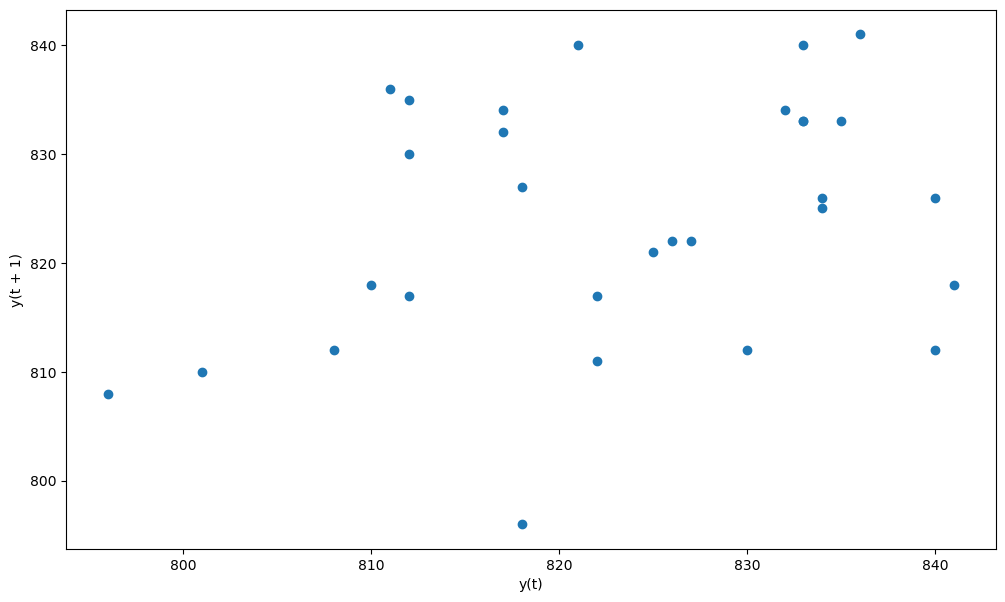

In [22]:
lp = LagPlot(df, 'number_sold')
lp.saveplot('lagplot')